In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import xarray as xr
import cmocean.cm as cmo 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.spatial import Delaunay

In [40]:
path1 ='../../../automated_testing/integrated_tests/idealised/Thule/results_WQNC_250/'
path2 ='../../../automated_testing/integrated_tests/idealised/Thule/results_CQNC_250/'
Quad1 = xr.open_dataset(path1 + 'main_output_ANT_00001.nc')
Quad2 = xr.open_dataset(path2 + 'main_output_ANT_00001.nc')

In [41]:
# Seperat into variables
Va1 = Quad1['V']
V = Va1.T

Tria1 = Quad1['Tri'] - 1  
Tri = Tria1.T

triang = tri.Triangulation(V[:, 0], V[:, 1], Tri)

Hi_l = Quad1['Hi']
Hib_l = Quad1['Hib']
Hs_l = Quad1['Hs']
Hb_l = Quad1['Hb']
BMB_l = Quad1['BMB']
So = Quad1['S_ocean'][0]
To1 = Quad1['T_ocean'][0]
#T_fp = Quad1['T_freezing_point']
mask_gr = Quad1['mask_grounded_ice']
To2 = Quad2['T_ocean'][0]

In [27]:
u = 0
tfs = 20 
afs = 18 
tifs = 15 
cbfs = 18
ctfs = 15
n = 800000
m = n + 100000

In [28]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.6, 
    
}

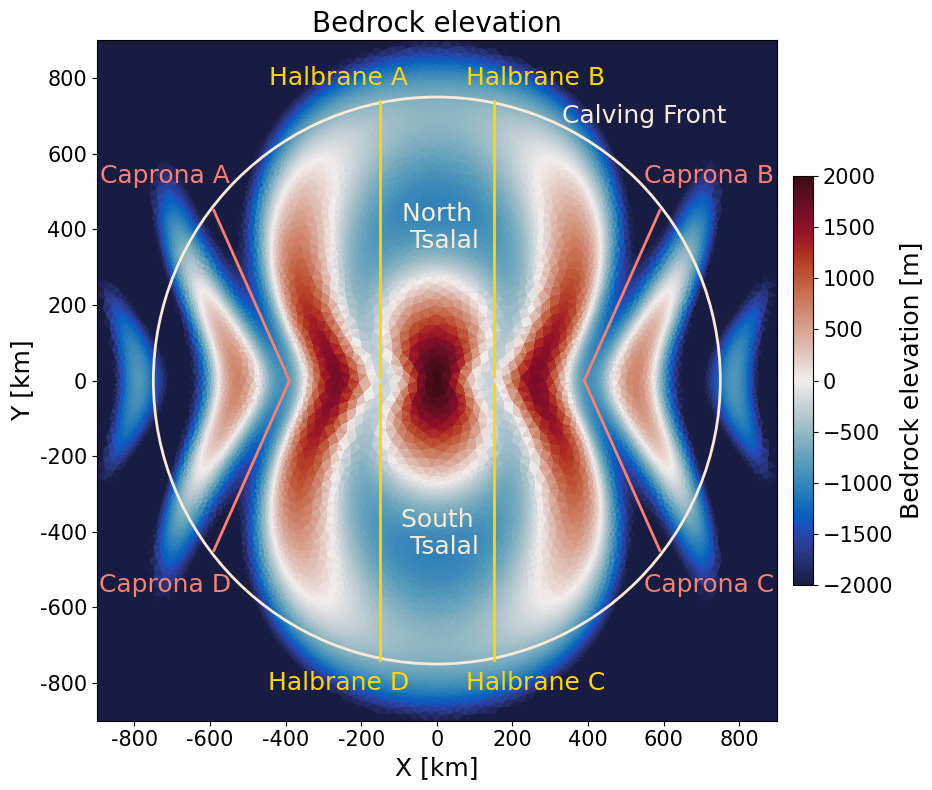

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8)) 

ax.set_title('Bedrock elevation', fontsize=tfs)

c0 = ax.tripcolor(triang, Hb_l[u], cmap=cmo.balance , vmin=-2000, vmax=2000)

cbar = fig.colorbar(c0, ax=ax, label="Bedrock elevation [m]", **colorbar_kwargs)
cbar.ax.tick_params(labelsize=ctfs)
cbar.set_label("Bedrock elevation [m]", fontsize=cbfs)


ax.set_aspect('equal')
ax.set_xlabel('X [km]', fontsize=afs)
ax.set_ylabel('Y [km]', fontsize=afs)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.tick_params(axis='both', labelsize=tifs)
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-m,m)
ax.set_ylim(-m,m)


circle = plt.Circle((0, 0), 750000, color='antiquewhite', fill=False, linestyle='-', linewidth=2)
ax.add_artist(circle)

ax.plot([150000, 150000], [10000, 740000], color='gold', linestyle='-', linewidth=2)
ax.plot([150000, 150000], [-10000, -740000], color='gold', linestyle='-', linewidth=2)
ax.plot([-150000, -150000], [10000, 740000], color='gold', linestyle='-', linewidth=2)
ax.plot([-150000, -150000], [-10000, -740000], color='gold', linestyle='-', linewidth=2)

ax.text(260000, 800000, 'Halbrane B', fontsize=afs, color='gold', ha='center', va='center')
ax.text(-260000, 800000, 'Halbrane A', fontsize=afs, color='gold', ha='center', va='center')
ax.text(-260000, -800000, 'Halbrane D', fontsize=afs, color='gold', ha='center', va='center')
ax.text(260000, -800000, 'Halbrane C', fontsize=afs, color='gold', ha='center', va='center')

ax.text(0, +440000, ' North ', fontsize=afs, color='antiquewhite', ha='center', va='center')
ax.text(0, +370000, '  Tsalal', fontsize=afs, color='antiquewhite', ha='center', va='center')
ax.text(0, -440000, '  Tsalal', fontsize=afs, color='antiquewhite', ha='center', va='center')
ax.text(0, -370000, ' South ', fontsize=afs, color='antiquewhite', ha='center', va='center')
ax.plot([390000, 590000], [0, 450000], color='salmon', linestyle='-', linewidth=2)
ax.plot([-390000, -590000], [0, 450000], color='salmon', linestyle='-', linewidth=2)
ax.plot([-390000,- 590000], [0, -450000], color='salmon', linestyle='-', linewidth=2)
ax.plot([390000, 590000], [0, -450000], color='salmon', linestyle='-', linewidth=2)

ax.text(720000, 540000, 'Caprona B', fontsize=afs, color='salmon', ha='center', va='center')
ax.text(-720000, 540000, 'Caprona A', fontsize=afs, color='salmon', ha='center', va='center')
ax.text(-720000, - 540000, 'Caprona D', fontsize=afs, color='salmon', ha='center', va='center')
ax.text(720000, - 540000, 'Caprona C', fontsize=afs, color='salmon', ha='center', va='center')

ax.text(550000, 700000, 'Calving Front', fontsize=afs, color='Antiquewhite', ha='center', va='center')

plt.tight_layout()
plt.show()

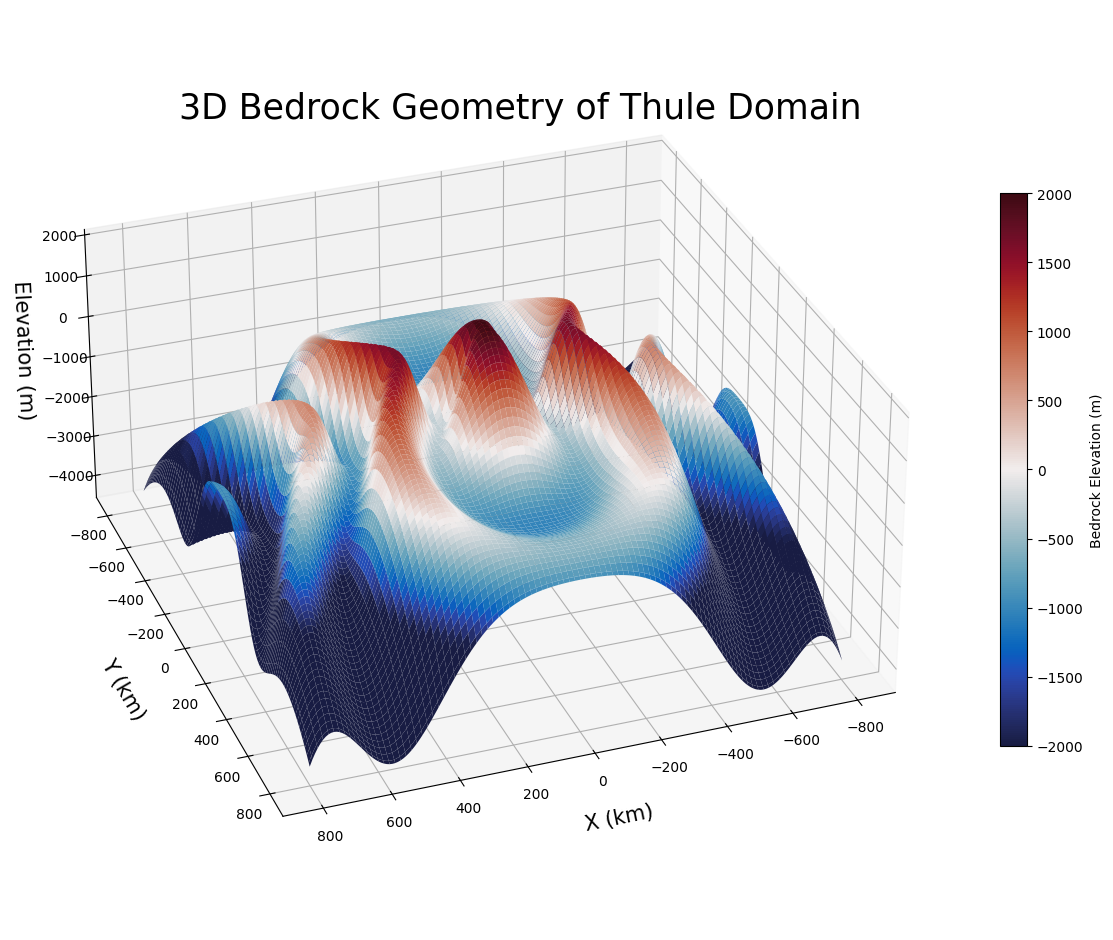

In [30]:
def bed_geometry(x, y, R=800e3, Bc=900, Bl=-2000, Ba=1100):
    """
    Calculate bedrock elevation for the Thule domain geometry
    
    Parameters:
        x, y : array_like
            Coordinate grids (m)
        R : float, optional
            Domain radius (m), default 800 km
        Bc : float, optional
            Central bedrock elevation (m), default 900
        Bl : float, optional
            Minimum bedrock elevation (m), default -2000
        Ba : float, optional
            Bedrock amplitude (m), default 1100
            
    Returns:
        B : ndarray
            Bedrock elevation (m)
    """
    rc = 0  # Core radius
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    
    l = R - (np.cos(2 * theta) * R) / 2
    a = Bc - (Bc - Bl) * (r - rc)**2 / (R - rc)**2
    B = Ba * np.cos(3 * np.pi * r / l) + a
    
    return B

vmin, vmax = -2000, 2000

# Create coordinate grid
n_points = 200
x = np.linspace(-800e3, 800e3, n_points)
y = np.linspace(-800e3, 800e3, n_points)
X, Y = np.meshgrid(x, y)

# Calculate bedrock elevation
Z = bed_geometry(X, Y)

# Create 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot surface with topographic colormap
surf = ax.plot_surface(X/1e3, Y/1e3, Z, 
                      #cmap='coolwarm',
                      cmap=cmo.balance,
                      vmin=vmin,
                      vmax=vmax,
                      rstride=2, 
                      cstride=2,
                      linewidth=0,
                      antialiased=True)

# Add colorbar
cbar = fig.colorbar(surf, shrink=0.6, aspect=20)
cbar.set_label('Bedrock Elevation (m)')

# Set labels and title
ax.set_xlabel('X (km)', fontsize = 15, labelpad=15)
ax.set_ylabel('Y (km)', fontsize = 15, labelpad=15)
ax.set_zlabel('Elevation (m)', fontsize = 15, labelpad=10)
#ax.set_title('3D Bedrock Geometry of Thule Domain',  pad=20, fontsize = 25)


# Squash the z-axis by setting different aspect ratios
# Get current limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

# Calculate the desired compression factor (adjust this value as needed)
z_compression_factor = 0.5  # 0.2 means z-axis will be 1/5th of its original scale

# Set the box aspect to compress z-axis
ax.set_box_aspect((1, 1, z_compression_factor))

# Reapply the original limits to maintain data proportions
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)


# Adjust viewing angle
ax.view_init(elev=30, azim=70)

fig.suptitle('3D Bedrock Geometry of Thule Domain', 
             y=0.82,  # Positions title near bottom (0 would be at very bottom)
             fontsize=25, 
             verticalalignment='bottom')


plt.tight_layout()
plt.show()

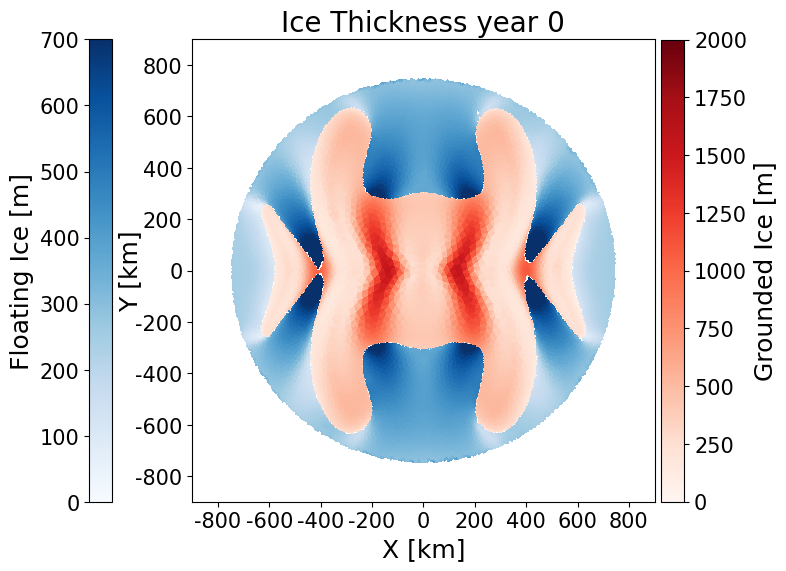

In [31]:
#Masks 
    # Ocean 
radius = 750000

distances1 = np.sqrt(V[:, 0]**2 + V[:, 1]**2)
mask_ocean = distances1 <= radius

    # Grounded ice
def mask_rock(Hs,Hi,Hb,u):
    p = 0.01
    mask = (Hs[u] - Hi[u] - Hb[u] >= p)
    return mask
mask0 = mask_rock(Hs_l, Hi_l, Hb_l, 0)

fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 

# Plot floating ice
c0 = ax.tripcolor(triang, (Hi_l[0]).where(mask_ocean & ~mask0), cmap='Reds', vmin=0, vmax=2000)
# Add color bar for floating ice
cbar0 = fig.colorbar(c0, ax=ax, **colorbar_kwargs)
cbar0.set_label("Grounded Ice [m]", fontsize=cbfs)
cbar0.ax.tick_params(labelsize=ctfs)

# Plot grounfloatinfded ice
c1 = ax.tripcolor(triang, (Hi_l[0]).where(mask_ocean & mask0), cmap='Blues', vmin=0, vmax=700)
# Add color bar for grounded ice on the left
divider = make_axes_locatable(ax)
cax1 = divider.append_axes("left", size="5%", pad=0.8)
cbar1 = fig.colorbar(c1, cax=cax1)
cbar1.set_label("Floating Ice [m]", fontsize=cbfs)
cbar1.ax.tick_params(labelsize=ctfs)
cax1.yaxis.set_label_position('left')
cax1.yaxis.tick_left()

ax.set_title('Ice Thickness year 0', fontsize=tfs)
ax.set_xlabel('X [km]', fontsize=afs)
ax.set_ylabel('Y [km]', fontsize=afs, labelpad=-5)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-m, m)
ax.set_ylim(-m, m)
ax.set_aspect('equal')
ax.tick_params(axis='both', labelsize=tifs)

plt.tight_layout()
plt.show()

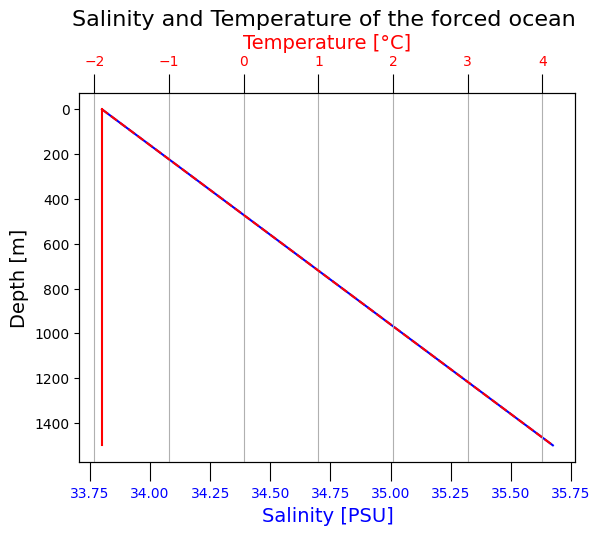

In [47]:
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis
ax1.plot (So.mean(dim='vi'),So['depth'], color='blue', label='Salinity')
ax1.set_ylabel('Depth [m]', fontsize=14)
ax1.set_xlabel('Salinity [PSU]', color='blue', fontsize=14)
ax1.tick_params(axis='x', labelcolor='blue', size=14)



# Create a secondary y-axis
ax2 = ax1.twiny()
ax2.plot( To1.mean(dim='vi'),To['depth'], color='red', linestyle='--', label='Temperature')
ax2.plot( To2.mean(dim='vi'),To['depth'], color='red', linestyle='-', label='Temperature')
ax2.set_xlabel('Temperature [°C]', color='red', fontsize=14)
ax2.tick_params(axis='x', labelcolor='red', size=14)
ax2.invert_yaxis()  # Invert the y-axis

# Add a title
plt.title('Salinity and Temperature of the forced ocean ', fontsize=16)
plt.grid()
plt.show()

In [ ]:
plt.close('all')